# **Proyecto 04** - Elizabeth Gpe. Carrillo Casillas
### Este proyecto consiste en recopilar información sobre ventas e ingresos de la empresa Dell para determinar si es conveniente invertir o no en dicha empresa

Comenzamos agregando librerías que necesitaremos para el web scraping

In [185]:
!pip install html5lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [187]:
import pandas as pd
import requests
import html5lib
from bs4 import BeautifulSoup

Vamos a definir una variable con la dirección URL del sitio web del cual tomaremos la información

In [201]:
url="https://es.marketscreener.com/cotizacion/accion/DELL-TECHNOLOGIES-INC-50061235/agenda/"
html_data=requests.get(url).text

#esto nos servirá para tomar información directamente de elementos HTML
soup = BeautifulSoup(html_data,"html5lib")

En el siguiente fragmento de código se realiza la extracción de información del sitio web, en este caso se hizo uso de búsqueda por etiquetas y clases de manera directa y con uso de ciclos y condicionales debido a que la información no estaba ordenada de la forma que se requería para analizarla.

In [296]:
#en esta parte delimitaremos la búsqueda en un div que contiene toda la información necesaria, omitiendo demás contenido innecesario para este caso
contenido=soup.find("div", attrs={"id":"Tableau_Histo_Pub1"} )


datos=[] #contendrá los datos sin formato específico
valores=[] 
#buscamos los td en los que se encuentra la información
for x in contenido.findAll("td", attrs={"class":"bc2V"}): #primero ubicamos el td
  for y in x.findAll("span", attrs={"class":"rtPubl"}): #luego ubicamos el span que contiene el dato
    #con este if podemos ir creando objetos de acuerdo a los renglones de la tabla
    if(y.getText()=="Publicado"):
      if(valores!=[]):
        datos.append(valores)
        valores=[]
    else:
      valor=y.getText().replace(" ", "").replace(",",".")
      if valor!="":
        valor=float(valor) #convertimos a float para poder realizar operaciones después
      else:
        valor=None
      valores.append(valor) #lista provisional para ir creando las filas

#añadimos las filas creadas a la lista de datos
datos.append(valores)

#el siguiente ciclo es para obtener las fechas, ya que estas no se encontraban junto a los datos en el HTML
years=[]
for y in contenido.findAll("td", attrs={"class":"bc2Y"}):
  if (y.getText()!="2023"): #excluimos el año 2023 porque aún no tiene datos
    years.append(y.getText()) #vamos agranado cada año a la lista provisional de años

#creamos nuestro dataframe
df = pd.DataFrame()
#agregamos columna year con los datos de la lista years
df["year"]=years

i=0
#con este ciclo tomaremos las columnas y les iremos agregando los datos extraídos anteriomente
for col in contenido.findAll("td", attrs={"class":"bc2T"}):
  c=col.find("a")
  if len(datos)!=i: #delimitamos de acuerdo al tamaño del arreglo para que no de error
    df[c.getText()]=datos[i]
    i+=1

Con lo anterior ya se encuentra creado y listo nuestro dataframe, vamos a verlo y analizarlo:

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           5 non-null      object 
 1   Ventas                         5 non-null      float64
 2   Resultado operacional          5 non-null      float64
 3   Resultado de explot.           5 non-null      float64
 4   Beneficios antes del impuesto  5 non-null      float64
 5   Resultado Neto                 5 non-null      float64
 6   BPA                            4 non-null      float64
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes


Nuestro df contiene 7 columnas y 5 filas, la mayoría son de tipo float(lo definimos anteriormente) y tiene 1 dato nulo en la columna BPA. Como es poca información podemos verla completa al imprimir el df o utilizando la función head()

In [298]:
df

,year,Ventas,Resultado operacional,Resultado de explot.,Beneficios antes del impuesto,Resultado Neto,BPA
0,2018,78660.0,8217.0,6855.0,-5688.0,-3728.0,NaN
1,2019,90621.0,10296.0,8854.0,-2361.0,-2310.0,-2.96
2,2020,92501.0,11787.0,10148.0,-4.0,4616.0,6.03
3,2021,94389.0,12747.0,10798.0,3670.0,3250.0,4.22
4,2022,101229.0,9660.0,7785.0,5923.0,5563.0,7.03


In [299]:
#eliminaremos la fila que tenía una columna vacía, ya que esta afecta las estadísticas
df.dropna()

,year,Ventas,Resultado operacional,Resultado de explot.,Beneficios antes del impuesto,Resultado Neto,BPA
1,2019,90621.0,10296.0,8854.0,-2361.0,-2310.0,-2.96
2,2020,92501.0,11787.0,10148.0,-4.0,4616.0,6.03
3,2021,94389.0,12747.0,10798.0,3670.0,3250.0,4.22
4,2022,101229.0,9660.0,7785.0,5923.0,5563.0,7.03


Con la siguiente función podremos calcular la media, máximo, mínimo y desviación estándar de cada columna con datos numéricos

In [300]:
df.describe()

,Ventas,Resultado operacional,Resultado de explot.,Beneficios antes del impuesto,Resultado Neto,BPA
count,5.000000,5.00000,5.000000,5.000000,5.000000,4.000000
mean,91480.000000,10541.40000,8888.000000,308.000000,1478.200000,3.580000
std,8210.328922,1778.77157,1626.849255,4636.922201,4216.800707,4.512435
min,78660.000000,8217.00000,6855.000000,-5688.000000,-3728.000000,-2.960000
25%,90621.000000,9660.00000,7785.000000,-2361.000000,-2310.000000,2.425000
50%,92501.000000,10296.00000,8854.000000,-4.000000,3250.000000,5.125000
75%,94389.000000,11787.00000,10148.000000,3670.000000,4616.000000,6.280000
max,101229.000000,12747.00000,10798.000000,5923.000000,5563.000000,7.030000


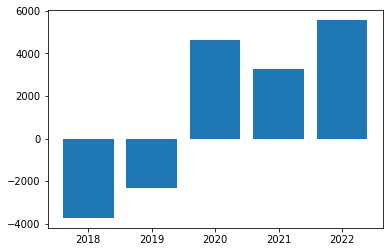

In [308]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(df["year"], df["Resultado Neto"])
plt.show()
